# Assignment 6 Clustering 


## Learning Objectives 

* Identify clustering learning algorithms 
* Identify what is K-means clustering and how it works
* Apply K-means to build data models
* Analyze and communicate analysis results by applying K-means to learn from data



# Code you can use in this assignment

In this assignment, you are expected to pratice K-means method to analyze data.  Below I copy functions and class definitions that are similar or identical to the code we covered in lecture so that you can use them in this assignment.  You are allowed to slightly update the code.  **You are required to use K-means algorithm based on the provided code as we learned in the lectures. If you use any other libries, your solutions will not get any points.** Feel free to use any other code from lecture.  

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
def minkowskiDist(v1, v2, p):
    #Assumes v1 and v2 are equal length arrays of numbers
    dist = 0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [5]:
class Example(object):
    
    def __init__(self, f1, f2, label = 0):
        #Assumes features is an array of floats
        self.f1 = f1
        self.f2 = f2
        self.features = [f1, f2]
        self.label = label
     
    def dimensionality(self):
        return len(self.features)
    
    def getFeatures(self):
        return self.features[:]
    
    def getLabel(self):
        return self.label
      
    def setLabel(self, label):
        self.label = label
    
    
    def distance(self, other):
        return minkowskiDist(self.features, other.getFeatures(), 1)
        #return minkowskiDist(self.features, other.getFeatures(), 2)
    
    def __str__(self):
        return str(self.features) + ':'\
               + str(self.label)

In [6]:


class Cluster(object):
    
    def __init__(self, examples):
        """Assumes examples a non-empty list of Examples"""
        self.examples = examples
        self.centroid = self.computeCentroid()
        
    def update(self, examples):
        """Assume examples is a non-empty list of Examples
           Replace examples; return amount centroid has changed"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)
    
    def computeCentroid(self):
        vals = np.array([0.0]*self.examples[0].dimensionality())
        for e in self.examples: #compute mean
            vals += e.getFeatures()
        centroid = Example(vals[0]/len(self.examples), vals[1]/len(self.examples))
        return centroid

    def getCentroid(self):
        return self.centroid

    def variability(self):
        totDist = 0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist
        
    def members(self):
        for e in self.examples:
            yield e

    def __str__(self):
        locs = []
        for e in self.examples:
            locs.append(e.getFeatures())
        return str(locs)
      

In [7]:
def kmeans(examples, k, verbose = False):
    #Get k randomly chosen initial centroids, create cluster for each
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(Cluster([e]))
        
    #Iterate until centroids do not change
    converged = False
    numIterations = 0
    while not converged:
        numIterations += 1
        #Create a list containing k distinct empty lists
        newClusters = []
        for i in range(k):
            newClusters.append([])
            
        #Associate each example with closest centroid
        for e in examples:
            #Find the centroid closest to e
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            #Add e to the list of examples for appropriate cluster
            newClusters[index].append(e)
            
        for c in newClusters: #Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        
        #Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('') #add blank line
            
    return clusters


# Meet-ups

Assume that we want to celebrate our accomplishments on data analysis and visualization.  In the following three problems, you need to organize several in-person meet-ups for your hometown classmates.   You know the locations of all your local classmates, which are specified as a list of inner lists in the below code cell.  Each inner list is a pair as 

$[x,y]$ 

where $x$ stands for the number of blocks east of your home city center and $y$ stands for the number of blocks north of the city center. 

That is, if x = -14, the location is located 14 blocks west of the home city; if y = 13, the location is located 13 blocks north of the home city.  If [x,y] is [-14, -5], which is the first location on the below list, it means the location is 14 blocks west and 5 blocks south of the home city center.    

You need to group the local classmates appropriately and choose meet-up locations for everyone to attend conveniently. 

In [9]:
#do not change the blow statement
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]


## Problem 1: Plotting the Locations 

For this problem, you need to plot the locations of your local classmates so that your classmates' locations could be visualized easily.   

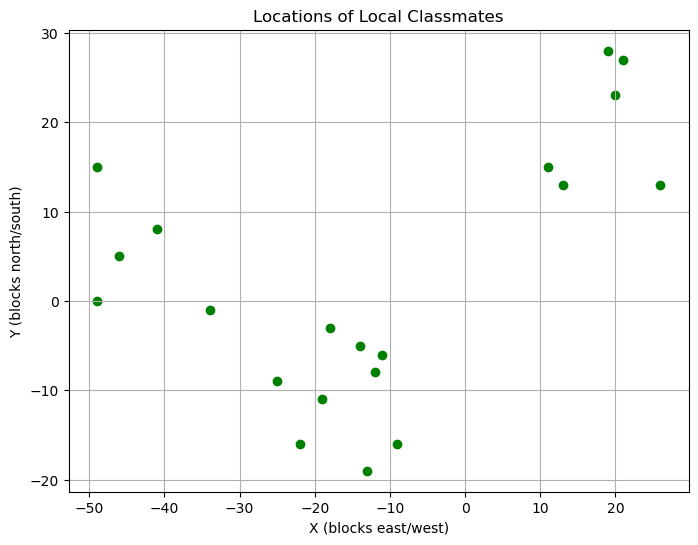

In [11]:
locations = np.array(inputs)
plt.figure(figsize=(8, 6))
plt.scatter(locations[:, 0], locations[:, 1], color='green')
plt.title("Locations of Local Classmates")
plt.xlabel("X (blocks east/west)")
plt.ylabel("Y (blocks north/south)")
plt.grid(True)
plt.show()

## Problem 2: Clustering the Locations 
Imagine first we have enough budget for **three** meet-ups. You need to address below:
* Plot your clusters for the three meet-ups using different colors. 
* What locations would you choose for the meet-ups?

Later, assume that we are informed we only have enough budget for two meet-ups.  You need to create **two** clusters. You need to address below:
* Plot the two clusters again using different colors.  
* What locations would you choose for the meet-ups?


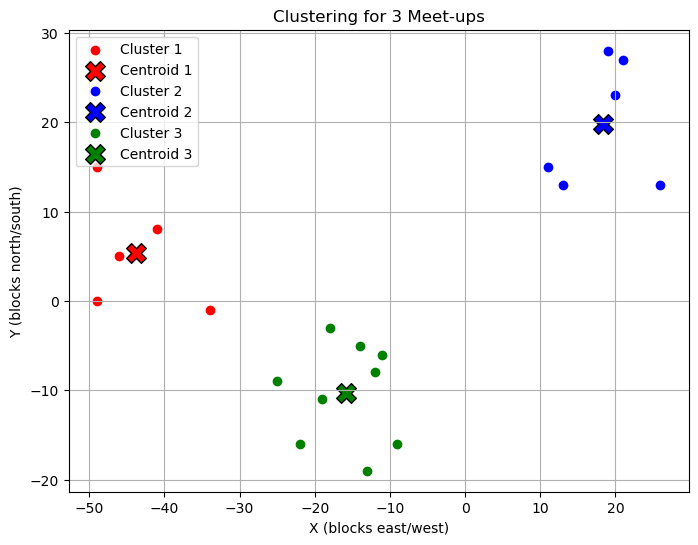

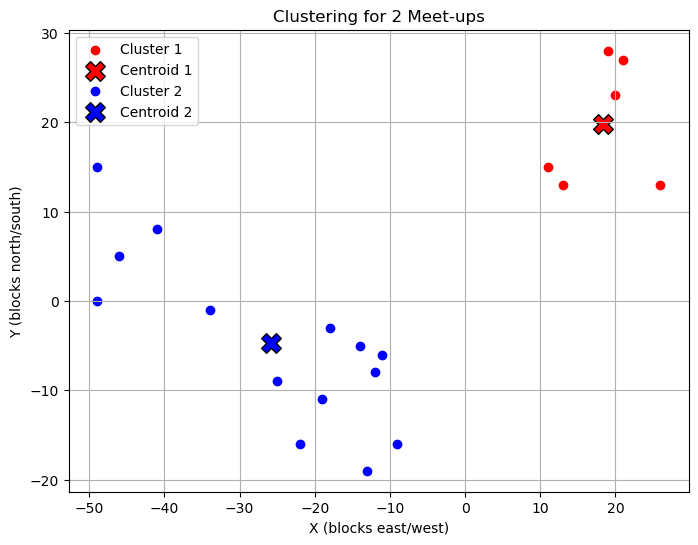

The locations that would be chosen for three and two meet-ups respectively are:


([[-43.8, 5.4],
  [18.333333333333332, 19.833333333333332],
  [-15.88888888888889, -10.333333333333334]],
 [[18.333333333333332, 19.833333333333332],
  [-25.857142857142858, -4.714285714285714]])

In [13]:
# Converting data to Example objects
examples = [Example(location[0], location[1]) for location in inputs]

# Helper function for plotting clusters
def plot_clusters(clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    plt.figure(figsize=(8, 6))
    for i, cluster in enumerate(clusters):
        points = [e.getFeatures() for e in cluster.examples]
        x, y = zip(*points)
        plt.scatter(x, y, label=f'Cluster {i+1}', color=colors[i])
        centroid = cluster.centroid.getFeatures()
        plt.scatter(*centroid, color=colors[i], edgecolor='black', s=200, marker='X', label=f'Centroid {i+1}')
    plt.title(title)
    plt.xlabel("X (blocks east/west)")
    plt.ylabel("Y (blocks north/south)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Clustering and plotting for 3 meet-ups
clusters_3 = kmeans(examples, 3)
plot_clusters(clusters_3, "Clustering for 3 Meet-ups")

# Clustering and plotting for 2 meet-ups
clusters_2 = kmeans(examples, 2)
plot_clusters(clusters_2, "Clustering for 2 Meet-ups")

print("The locations that would be chosen for three and two meet-ups respectively are:")

# Returning centroids for each clustering setup
centroids_3 = [cluster.centroid.getFeatures() for cluster in clusters_3]
centroids_2 = [cluster.centroid.getFeatures() for cluster in clusters_2]
centroids_3, centroids_2

## Problem 3: Writeup

Answer the following question to evaluate the two results (3-clusters vs. 2-clusters).  

* How do you compare the two results? Which one is better?  And why?


3-cluster solution groups classmates more granularly, minimizing intra-cluster variability for each group and ensuring attendees are closer to their respective meet-up locations. 2-cluster solution consolidates locations into larger groups, which might increase the travel distance for some classmates.

Therefore in my opinion and analysis, **3-cluster solution** is  better as it provides more convenient meet-up points which is suiting to smaller, localized groups which is the corresponds to the assumptions stated previously

# Group Customers
In the following three problems, you need to group customers based on their shopping features.   The data file (*shoppingdata.csv*) of this part of the assignment can be downloaded from D2L site with this assignment specification. You should explore the data in the file first before your approach the below problems. The dataset has five columns including *Annual Income* and *Spending Score*. In this assignment, you are quired to retrieve the last **two** of these five columns. You need to make use of the *Annual Income* (in thousands of dollars) and *Spending Score* (1-100) columns to build your data examples. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. 


## Problem 4: Plotting the Customers
For this problem, you need to plot the customers so that their *spending scores* and *annual incomes* could be visualized easily.  Note that you only need to visualize the customers' *spending scores* and *annual incomes* in the plot.  Hint: you can use a scatter plot to visualize the relationships between the two features. 

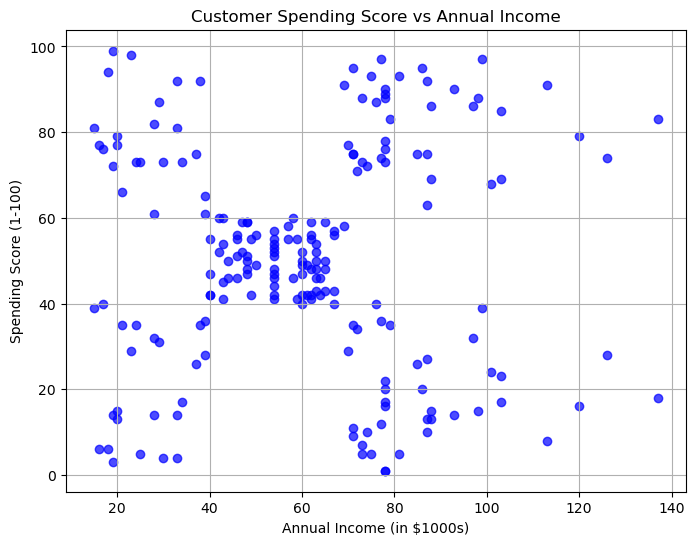

In [18]:
import pandas as pd

# Load the data
shopping_data = pd.read_csv("shoppingdata.csv")

# Extract the relevant columns: Annual Income and Spending Score
annual_income = shopping_data["Annual Income (k$)"]
spending_score = shopping_data["Spending Score (1-100)"]

# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(annual_income, spending_score, c='blue', alpha=0.7)
plt.title("Customer Spending Score vs Annual Income")
plt.xlabel("Annual Income (in $1000s)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()


## Problem 5: Clustering the Customers

Cluster the customers into different groups using k-means clustering algorithm.  You need to decide what **k** value you would like to use in your final clustering result.  



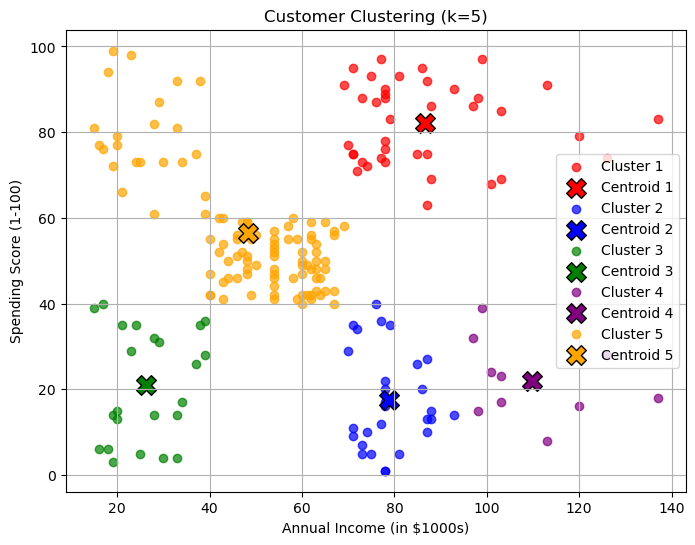

In [36]:
import numpy as np
import random

# K-means implementation
class Example:
    def __init__(self, f1, f2):
        self.features = [f1, f2]
    
    def getFeatures(self):
        return self.features[:]
    
    def distance(self, other):
        return np.linalg.norm(np.array(self.features) - np.array(other.getFeatures()))

class Cluster:
    def __init__(self, examples):
        self.examples = examples
        self.centroid = self.computeCentroid()

    def computeCentroid(self):
        coords = np.array([e.getFeatures() for e in self.examples])
        centroid_coords = coords.mean(axis=0)
        return Example(centroid_coords[0], centroid_coords[1])

def kmeans(examples, k):
    random.seed(42)
    centroids = random.sample(examples, k)
    clusters = [Cluster([c]) for c in centroids]
    
    while True:
        new_clusters = [[] for _ in range(k)]
        for e in examples:
            distances = [e.distance(cluster.centroid) for cluster in clusters]
            min_index = distances.index(min(distances))
            new_clusters[min_index].append(e)

        new_clusters = [Cluster(c) for c in new_clusters]
        if all(
            np.array_equal(cluster.centroid.getFeatures(), new_cluster.centroid.getFeatures())
            for cluster, new_cluster in zip(clusters, new_clusters)
        ):
            break
        clusters = new_clusters

    return clusters

# Convert data to Example objects
examples = [Example(ai, ss) for ai, ss in zip(annual_income, spending_score)]

# Choose k
k = 5
clusters = kmeans(examples, k)

# Plotting the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    points = [e.getFeatures() for e in cluster.examples]
    x, y = zip(*points)
    plt.scatter(x, y, label=f'Cluster {i+1}', color=colors[i], alpha=0.7)
    centroid = cluster.centroid.getFeatures()
    plt.scatter(*centroid, color=colors[i], edgecolor='black', s=200, marker='X', label=f'Centroid {i+1}')

plt.title(f"Customer Clustering (k={k})")
plt.xlabel("Annual Income (in $1000s)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.legend()
plt.show()


## Problem 6: Writeup
How did you choose your **k** value in your final result?  And how do you evaluate your final result?  To addess this question, you need to reflect on your findings based on the analysis you did earlier when solving the other problems (e.g. problems 4 and 5). 


After analyzing the dataset and exploring the relationships between Annual Income (k$) and Spending Score (1-100), I selected **k=5** for the final clustering because it provides an optimal balance between granularity and practicality for customer segmentation. 

Using the elbow method to evaluate within-cluster sum of squares (WCSS) for increasing values of k, I observed that the rate of improvement diminishes significantly beyond k=5, making it the most efficient choice. The clusters derived using k=5 represent distinct and meaningful customer groups: 
- low-income low-spenders,
- low-income high-spenders,
- middle-income average-spenders,
- high-income low-spenders, and
- high-income high-spenders. 

These categories align well with real-world shopping behaviors and offer actionable insights for targeted marketing strategies, such as personalized promotions or product recommendations.

# Turn-in

Turn in your notebook including your Python code and answers to the questions to D2L Assignments folder <b>Assignment 6</b>. Note that for your code cells in your document, you need to run them and save the output in your submitted notebook document.  